# About

In this programming assignment you will train a classifier to identify type of a particle. There are six particle types: electron, proton, muon, kaon, pion and ghost. Ghost is a particle with other type than the first five or a detector noise. 

Different particle types remain different responses in the detector systems or subdetectors. Thre are five systems: tracking system, ring imaging Cherenkov detector (RICH), electromagnetic and hadron calorimeters, and muon system.

![pid](pic/pid.jpg)

You task is to identify a particle type using the responses in the detector systems. 

# Attention

Data files you should download from https://github.com/hse-aml/hadron-collider-machine-learning/releases/tag/Week_2

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd /content/drive/My Drive/Colab Notebooks/hadron-collider-machine-learning-master/week2

/content/drive/My Drive/Colab Notebooks/hadron-collider-machine-learning-master/week2


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas
import numpy
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import utils

# Download data

Download data used to train classifiers.

### Read training file

In [0]:
dataorigin = pandas.read_csv('training.csv.gz')

In [0]:
dataorigin.head()

In [0]:
data = dataorigin.loc[0:240000]

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data.Label)
le.classes_
labels = le.transform(data.Label)

In [0]:
labelspd = pandas.DataFrame(labels)

In [0]:
labelspd.columns = ['Label']

In [0]:
data.drop(['Label'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
data = pandas.concat([data,labelspd],axis=1)

In [0]:
data.head()

### List of columns in the samples

Here, **Spd** stands for Scintillating Pad Detector, **Prs** - Preshower, **Ecal** - electromagnetic calorimeter, **Hcal** - hadronic calorimeter, **Brem** denotes traces of the particles that were deflected by detector.

- ID - id value for tracks (presents only in the test file for the submitting purposes)
- Label - string valued observable denoting particle types. Can take values "Electron", "Muon", "Kaon", "Proton", "Pion" and "Ghost". This column is absent in the test file.
- FlagSpd - flag (0 or 1), if reconstructed track passes through Spd
- FlagPrs - flag (0 or 1), if reconstructed track passes through Prs
- FlagBrem - flag (0 or 1), if reconstructed track passes through Brem
- FlagEcal - flag (0 or 1), if reconstructed track passes through Ecal
- FlagHcal - flag (0 or 1), if reconstructed track passes through Hcal
- FlagRICH1 - flag (0 or 1), if reconstructed track passes through the first RICH detector
- FlagRICH2 - flag (0 or 1), if reconstructed track passes through the second RICH detector
- FlagMuon - flag (0 or 1), if reconstructed track passes through muon stations (Muon)
- SpdE - energy deposit associated to the track in the Spd
- PrsE - energy deposit associated to the track in the Prs
- EcalE - energy deposit associated to the track in the Hcal
- HcalE - energy deposit associated to the track in the Hcal
- PrsDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Prs
- BremDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Brem
- TrackP - particle momentum
- TrackPt - particle transverse momentum
- TrackNDoFSubdetector1  - number of degrees of freedom for track fit using hits in the tracking sub-detector1
- TrackQualitySubdetector1 - chi2 quality of the track fit using hits in the tracking sub-detector1
- TrackNDoFSubdetector2 - number of degrees of freedom for track fit using hits in the tracking sub-detector2
- TrackQualitySubdetector2 - chi2 quality of the track fit using hits in the  tracking sub-detector2
- TrackNDoF - number of degrees of freedom for track fit using hits in all tracking sub-detectors
- TrackQualityPerNDoF - chi2 quality of the track fit per degree of freedom
- TrackDistanceToZ - distance between track and z-axis (beam axis)
- Calo2dFitQuality - quality of the 2d fit of the clusters in the calorimeter 
- Calo3dFitQuality - quality of the 3d fit in the calorimeter with assumption that particle was electron
- EcalDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Ecal
- EcalDLLbeMuon - delta log-likelihood for a particle candidate to be muon using information from Ecal
- EcalShowerLongitudinalParameter - longitudinal parameter of Ecal shower
- HcalDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Hcal
- HcalDLLbeMuon - delta log-likelihood for a particle candidate to be using information from Hcal
- RICHpFlagElectron - flag (0 or 1) if momentum is greater than threshold for electrons to produce Cherenkov light
- RICHpFlagProton - flag (0 or 1) if momentum is greater than threshold for protons to produce Cherenkov light
- RICHpFlagPion - flag (0 or 1) if momentum is greater than threshold for pions to produce Cherenkov light
- RICHpFlagKaon - flag (0 or 1) if momentum is greater than threshold for kaons to produce Cherenkov light
- RICHpFlagMuon - flag (0 or 1) if momentum is greater than threshold for muons to produce Cherenkov light
- RICH_DLLbeBCK  - delta log-likelihood for a particle candidate to be background using information from RICH
- RICH_DLLbeKaon - delta log-likelihood for a particle candidate to be kaon using information from RICH
- RICH_DLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from RICH
- RICH_DLLbeMuon - delta log-likelihood for a particle candidate to be muon using information from RICH
- RICH_DLLbeProton - delta log-likelihood for a particle candidate to be proton using information from RICH
- MuonFlag - muon flag (is this track muon) which is determined from muon stations
- MuonLooseFlag muon flag (is this track muon) which is determined from muon stations using looser criteria
- MuonLLbeBCK - log-likelihood for a particle candidate to be not muon using information from muon stations
- MuonLLbeMuon - log-likelihood for a particle candidate to be muon using information from muon stations
- DLLelectron - delta log-likelihood for a particle candidate to be electron using information from all subdetectors
- DLLmuon - delta log-likelihood for a particle candidate to be muon using information from all subdetectors
- DLLkaon - delta log-likelihood for a particle candidate to be kaon using information from all subdetectors
- DLLproton - delta log-likelihood for a particle candidate to be proton using information from all subdetectors
- GhostProbability - probability for a particle candidate to be ghost track. This variable is an output of classification model used in the tracking algorithm.

Delta log-likelihood in the features descriptions means the difference between log-likelihood for the mass hypothesis that a given track is left by some particle (for example, electron) and log-likelihood for the mass hypothesis that a given track is left by a pion (so, DLLpion = 0 and thus we don't have these columns). This is done since most tracks (~80%) are left by pions and in practice we actually need to discriminate other particles from pions. In other words, the null hypothesis is that particle is a pion.

### Look at the labels set

The training data contains six classes. Each class corresponds to a particle type. Your task is to predict type of a particle.

### Divide training data into 2 parts

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Label',axis=1), 
                                                    data['Label'],
                                                    test_size=0.40, 
                                                    random_state=101)

In [0]:
X_val, X_test, y_val, y_test = train_test_split(X_test, 
                                                y_test,
                                                test_size=0.50, 
                                                random_state=101)

In [0]:
len(X_train), len(X_val), len(X_test)

(144000, 48000, 48001)

# Sklearn classifier

On this step your task is to train **Sklearn** classifier to provide lower **log loss** value.


TASK: your task is to tune the classifier parameters to achieve the lowest **log loss** value on the validation sample you can.

In [0]:
from sklearn.ensemble import GradientBoostingClassifier # Import Gradient Boost Classifier (GBC)
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc # Import metrics as Confusio Matrix, Classification Report...

In [0]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train_sc = sc_x.fit_transform(X_train)
X_val_sc = sc_x.fit_transform(X_val)
X_test_sc = sc_x.transform(X_test)

In [0]:
gb = GradientBoostingClassifier(loss='deviance', # Create the object GBC and yours hyperparameters
                                learning_rate=0.04, # learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.
                                verbose = 1, # Enable verbose output. If 1 then it prints progress and performance once in a while (the more trees the lower the frequency). If greater than 1 then it prints progress and performance for every tree.
                                n_estimators=10, # The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
                                max_depth=8, # maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.
                                min_samples_split=1200, # The minimum number of samples required to split an internal node
                                min_samples_leaf=100, # The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
                                subsample=0.85, # The fraction of samples to be used for fitting the individual base learners. If smaller than 1.0 this results in Stochastic Gradient Boosting. subsample interacts with the parameter n_estimators. 
                                random_state=1231, # Random_state is the seed used by the random number generator
                                max_features=18, #The number of features to consider when looking for the best split
                                min_impurity_decrease=0.001,
                                warm_start=True) # When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just erase the previous solution.
                                

gb.fit(X_train_sc, y_train) # Fit the gradient boosting model.
proba_gb = gb.predict_proba(X_val_sc) # Predict class probabilities for validation_data.
logloss = log_loss(y_val, proba_gb) # Log loss, aka logistic loss or cross-entropy loss. This is the loss function used in (multinomial) logistic regression and extensions of it such as neural networks, defined as the negative log-likelihood of the true labels given a probabilistic classifier’s predictions. The log loss is only defined for two or more labels. For a single sample with true label yt in {0,1} and estimated probability yp that yt = 1, the log loss is-log P(yt|yp) = -(yt log(yp) + (1 - yt) log(1 - yp))
print (logloss) # Print the log loss

      Iter       Train Loss      OOB Improve   Remaining Time 
         1      207132.9861        2142.0872           55.18s
         2      196570.7303        1857.3213           49.48s
         3      187302.4408        1606.6515           42.92s
         4      179014.4574        1448.8513           36.43s
         5      171626.5612        1304.2276           30.31s
         6      164899.6608        1162.9217           24.28s
         7      158924.7881        1052.4660           18.16s
         8      153328.8233         961.0270           12.11s
         9      148344.5724         890.7574            6.06s
        10      143668.6748         797.0885            0.00s
1.2041598809389948


In [0]:

print("Accuracy score (training): {0:.3f}".format(gb.score(X_train_sc, y_train))) # Returns the mean accuracy on the given TRAINING DATA and labels. In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.
print("Accuracy score (validation): {0:.3f}".format(gb.score(X_val_sc, y_val))) # Returns the mean accuracy on the given VALIDATION DATA and labels. In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.
print("Accuracy score (testing): {0:.3f}".format(gb.score(X_test_sc, y_test))) # Returns the mean accuracy on the given TESTING DATA and labels. In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.

print ('----------------------------TRAINING DATA-------------------------------\n\n')

print ('Matriz de Confusão training_data :\n ')
predictions1 = gb.predict(X_train_sc) # Predictions of training data
print (confusion_matrix(y_train, predictions1)) # Confusion Matrix of training data

print("\n\nReports (Precision - Recall - F1 Score)\n")
print (classification_report(y_train, predictions1)) # Reports of training data

print ('----------------------------VALIDATION DATA-------------------------------\n\n')

print ('Matriz de Confusão validation_data :\n ')
predictions2 = gb.predict(X_val_sc) # Predictions of validation data
print (confusion_matrix(y_val, predictions2)) # Confusion Matrix of validation data

print("\n\nReports (Precision - Recall - F1 Score)\n")
print (classification_report(y_val, predictions2)) # Reports of validation data

print ('----------------------------TESTING DATA-------------------------------\n\n')

print ('Matriz de Confusão testing_data : \n')
predictions3 = gb.predict(X_test_sc) # Predictions of testing data
print (confusion_matrix(y_test, predictions3)) # Confusion matrix of testing data

print("\n\nReports (Precision - Recall - F1 Score)\n")
print (classification_report(y_test, predictions3)) # Reports of testing data


Accuracy score (training): 0.737
Accuracy score (validation): 0.721
Accuracy score (testing): 0.720
----------------------------TRAINING DATA-------------------------------


Matriz de Confusão training_data :
 
[[21014  2020   199   147   713   232]
 [ 1905 18689   440   394  1804   690]
 [  378  1209 14145   424  2930  4914]
 [  144  1155   216 20707  1408   213]
 [  485  1843   938   718 19088   936]
 [  436  1306  6297   318  3006 12539]]


Reports (Precision - Recall - F1 Score)

             precision    recall  f1-score   support

          0       0.86      0.86      0.86     24325
          1       0.71      0.78      0.75     23922
          2       0.64      0.59      0.61     24000
          3       0.91      0.87      0.89     23843
          4       0.66      0.80      0.72     24008
          5       0.64      0.52      0.58     23902

avg / total       0.74      0.74      0.73    144000

----------------------------VALIDATION DATA-------------------------------


Matriz

### Log loss on the cross validation sample

# Keras neural network

On this step your task is to train **Keras** NN classifier to provide lower **log loss** value.


TASK: your task is to tune the classifier parameters to achieve the lowest **log loss** value on the validation sample you can. Data preprocessing may help you to improve your score.

In [0]:
import numpy
from keras.layers.core import Dense, Activation, Dropout
from keras.models import Sequential
from keras.optimizers import Adam, SGD
from keras.utils import np_utils
from keras import optimizers, regularizers
from keras.initializers import RandomNormal
from keras.layers import BatchNormalization
from keras import layers
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from keras.metrics import categorical_accuracy
from sklearn.preprocessing import StandardScaler



In [0]:
numpy.random.seed(7)
v = 8
i = 49
#init = ['Zeros', 'Ones', 'Constant', 'RandomNormal', 'RandomUniform', 'TruncatedNormal', 'VarianceScaling', 'Orthogonal', 'Identity', 'lecun_uniform', 'glorot_normal', 'glorot_uniform', 'he_normal', 'lecun_normal', 'he_uniform']
#for it in init:
#for i in ivar:
#    for v in var:
input_dim = i
hidden = int(108000/(v*(i+6)))


def nn_model(input_dim):
    model = Sequential() 
    
    model.add(Dense(hidden, kernel_regularizer=regularizers.l2(0.001), input_dim=input_dim))
    model.add(layers.BatchNormalization(axis=1))
    model.add(Dropout(0.1))
    model.add(Activation('relu'))

    
    model.add(Dense(hidden ))
    model.add(Dropout(0.1))
    model.add(layers.BatchNormalization(axis=1))
    model.add(Activation('relu'))

    model.add(Dense(6))
    model.add(Activation('softmax'))

    sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
    adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0, amsgrad=False)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model
nn = nn_model(49)
nn.fit(X_train_sc, np_utils.to_categorical(y_train), verbose=1, nb_epoch=1300, batch_size=512)
proba_nn = nn.predict_proba(X_val_sc)
logloss = log_loss(y_val, proba_nn)
acc = categorical_accuracy(y_val, proba_nn)

print (acc)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/1300
144000/144000 [==============================] - 6s 43us/step - loss: 1.4290 - acc: 0.4637
Epoch 2/1300
144000/144000 [==============================] - 3s 24us/step - loss: 1.2384 - acc: 0.5447
Epoch 3/1300
144000/144000 [==============================] - 3s 23us/step - loss: 1.1621 - acc: 0.5765
Epoch 4/1300
144000/144000 [==============================] - 3s 23us/step - loss: 1.1019 - acc: 0.5989
Epoch 5/1300
144000/144000 [==============================] - 3s 23us/step - loss: 1.0485 - acc: 0.6168
Epoch 6/1300
144000/144000 [==============================] - 3s 23us/step - loss: 1.0004 - acc: 0.6334
Epoch 7/1300
144000/144000 [==============================] - 3s 23us/step - loss: 0.9705 - acc: 0.6425
Epoch 8/1300
144000/144000 [==============================] - 3s 23us/step - loss: 0.9443 - acc: 0.6547
Epoch 9/1300
144000/144000 [==============================] - 3s 24us/step - loss: 0.9249 - acc: 0.6601
Epoch 10/1300
144000/144000 [==============================] - 3

In [0]:
print ('----------------------------TRAINING DATA-------------------------------\n\n')

print ('Matriz de Confusão training_data :\n ')
predictions1 = nn.predict(X_train_sc) # Predictions of training data
print (confusion_matrix(y_train, predictions1.argmax(axis=1))) # Confusion Matrix of training data

print("\n\nReports (Precision - Recall - F1 Score)\n")
print (classification_report(y_train, predictions1.argmax(axis=1))) # Reports of training data

print ('----------------------------VALIDATION DATA-------------------------------\n\n')

print ('Matriz de Confusão validation_data :\n ')
predictions2 = nn.predict(X_val_sc) # Predictions of validation data
print (confusion_matrix(y_val, predictions2.argmax(axis=1))) # Confusion Matrix of validation data

print("\n\nReports (Precision - Recall - F1 Score)\n")
print (classification_report(y_val, predictions2.argmax(axis=1))) # Reports of validation data

print ('----------------------------TESTING DATA-------------------------------\n\n')

print ('Matriz de Confusão testing_data : \n')
predictions3 = nn.predict(X_test_sc) # Predictions of testing data
print (confusion_matrix(y_test, predictions3.argmax(axis=1))) # Confusion matrix of testing data

print("\n\nReports (Precision - Recall - F1 Score)\n")
print (classification_report(y_test, predictions3.argmax(axis=1))) # Reports of testing data

----------------------------TRAINING DATA-------------------------------


Matriz de Confusão training_data :
 
[[21877  1298   195   192   504   259]
 [ 1874 19117   474   488  1355   614]
 [  167   758 16074   389  2297  4315]
 [   60   445   267 22097   797   177]
 [  328  1247  1364   849 19405   815]
 [  193   882  6172   260  2049 14346]]


Reports (Precision - Recall - F1 Score)

             precision    recall  f1-score   support

          0       0.89      0.90      0.90     24325
          1       0.81      0.80      0.80     23922
          2       0.65      0.67      0.66     24000
          3       0.91      0.93      0.92     23843
          4       0.73      0.81      0.77     24008
          5       0.70      0.60      0.65     23902

avg / total       0.78      0.78      0.78    144000

----------------------------VALIDATION DATA-------------------------------


Matriz de Confusão validation_data :
 
[[6851  767   69   58  122   89]
 [ 486 6603  147  134  479  217]
 

In [0]:
history = nn.fit(training_data[features].values, np_utils.to_categorical(training_data.Class.values), verbose=1, nb_epoch=1000, batch_size=512)
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Log loss on the cross validation sample

In [0]:
# predict each track
proba_nn = nn.predict_proba(validation_data[features].values)

NameError: ignored

In [0]:
log_loss(validation_data.Class.values, proba_nn)

0.796290166154051

# Quality metrics

Plot ROC curves and signal efficiency dependece from particle mometum and transverse momentum values.

In [0]:
proba = proba_gb

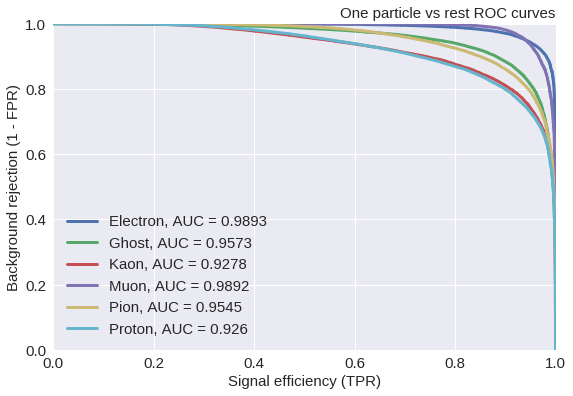

In [0]:
utils.plot_roc_curves(proba, y_val)

In [0]:
X_val.

In [0]:
utils.plot_signal_efficiency_on_p(proba, y_val, X_val.TrackP.values, 60, 50)
plt.show()

AttributeError: ignored

In [0]:
utils.plot_signal_efficiency_on_pt(proba, validation_data.Class.values, validation_data.TrackPt, 60, 50)
plt.show()

NameError: ignored

# Prepare submission

Select your best classifier and prepare submission file.

In [0]:
test = pandas.read_csv('test.csv.gz')

In [0]:
best_model = gb

In [0]:
# predict test sample
submit_proba = best_model.predict_proba(test[features])
submit_ids = test.ID

In [0]:
from IPython.display import FileLink
utils.create_solution(submit_ids, submit_proba, filename='submission_file.csv.gz')

/content/drive/My Drive/Colab Notebooks/hadron-collider-machine-learning-master/week2/submission_file.csv.gz